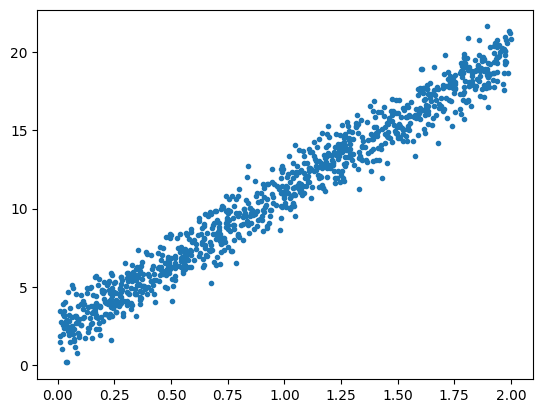

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# Om du kör en seed i verkligheten så bli detta en typ av overfitting
# din seed blir en hyper parameter
np.random.seed(42)

samples = 1000 

X = 2*np.random.rand(samples, 1)
y = 2+9*X+np.random.randn(samples, 1)

plt.plot(X, y, '.')

In [3]:
# Almost the same as columnstack, when dealing with 1D arrays it behaviese 
# almost identically
X = np.c_[np.ones(samples), X]

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Factoriella probelm är icke bräkningsbara, det går inte att bygga en dator kraftfull
# nog att göra beräkningen.

# Teta = Beta i icke linjära funktioner
# Gradient ska vara ner vänd triangel (ändra) dvs steglängden

# I maskininlärning så har vi bytt sample som är ett stickprov är nu en observation
# och batch i maskninlärning är ett stickprove 
# sample = observation
# batch = stickprove

def gradient_descent(X, y, learning_rate=.1, iterations=100):
    m = len(X)
    theta = np.random.rand(X.shape[1], 1)

    for _ in range(iterations):
        gradient = (2/m)*X.T @ (X @ theta - y)
        theta -= learning_rate*gradient
    return theta

theta = gradient_descent(X_train, y_train)
theta
m = len(X_train)

len(X_train)
(2/m)*X.T

array([[0.00298507, 0.00298507, 0.00298507, ..., 0.00298507, 0.00298507,
        0.00298507],
       [0.00223606, 0.00567591, 0.00437011, ..., 0.00081683, 0.00567306,
        0.00266272]])

In [5]:
steps = range(1, 200, 1)
# För varje step så gör vi en gradient descent på vår theta
thetas = [gradient_descent(X,y,iterations=iteration).reshape(-1) for iteration in steps]
thetas = np.array(thetas)
thetas.shape

(199, 2)

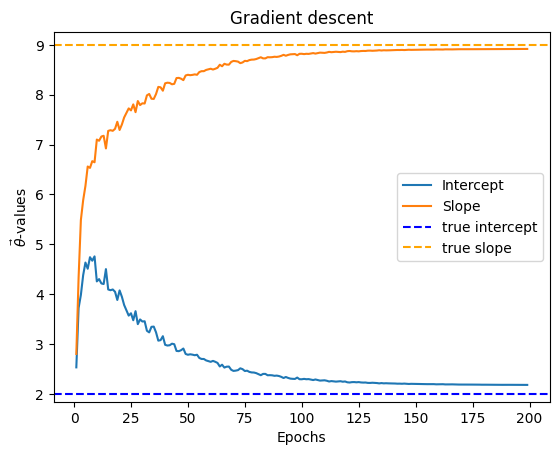

In [6]:
# Helt vanligt Gradient Descent
fig, ax = plt.figure(dpi=100), plt.axes()
ax.plot(steps, thetas, label = ["Intercept", "Slope"])
ax.axhline(y=2, color='b', linestyle='--', label="true intercept")
ax.axhline(y=9, color='orange', linestyle='--', label="true slope")
ax.set(xlabel="Epochs", ylabel=r'$\vec{\theta}$-values ', title='Gradient descent')
ax.legend()
# Eftersom leraning raten (0.1) appliceras gång på gång så minskar den exponentielt
# vi behöver alltid ha någon typ av learning rate annars kommer den bara hoppa omkring
# men det räknas ändå inte som adeptive


# Vanlig Gradient Descent, är inte snabbar än OLS för den har en liknande formel
# så den kommer gå långsammar så ju större stickrpove. 

In [ ]:
# Stochastic Gradient Descent
# Stochastic gradient desent kom 2014 och va ett genombrott, för vi 
# kan bar anänvda SGD för att träna neurala Nätverk

# Adaptive : Ja
# Momentum : Nej

epochs = 10 
t0, t1 = 5, 50

def learning_rate_schedulet(t):
    return t0/(t+t1)

theta = np.random.randn(2, 1)

m = len(X_train)

# Minskar lerning rate ju färr epocer och ju fler features
for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        x_i = X_train[random_index:random_index+1]
        y_i = y_train[random_index:random_index+1]
        
        gradients = 2*x_i.T.dot(x_i.dot(theta)-y_i)
        eta = learning_rate_schedulet(epoch*m+i)
        theta -= eta*gradients

theta

# SGD kan hoppa över lokal minimum, detta kan inte vanlig GD
# Browns motion, ett object täcker alla punkter i ett rum om du har en oändlig tid
# Därför kommger SGD att hoppa ur ett lokalt minimum givet tillräckligt med tid

# SGD minumum : byt ut +1 i [random_index:random_index+1] mot random_intiger
X_train.shape, y_train.shape

((670, 2), (670, 1))

In [8]:
y_pred = X_test@theta

MAE = np.mean(np.absolute(y_test-y_pred))
MSE = np.mean(np.square(y_test-y_pred))
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(0.7686225381332923, 0.9514875367265972, 0.9754422262372063)

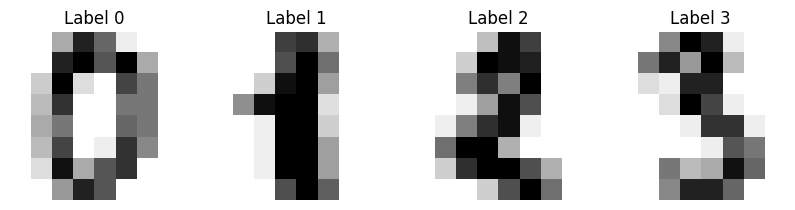

In [9]:
# Classifikation av handskrivna siffror
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 

digits = load_digits()

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label {label}")

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np 
 
X_digits, Y_digits = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X_digits, Y_digits, test_size=0.5, random_state=42)

knn = KNeighborsClassifier(n_neighbors=1)
log = LogisticRegression(max_iter=10000)

X_train.shape

# Det vi gör är jämför pixel för pixel och den som är närmst är den siffrar den liknar
# mest så den tar vi

knn.fit(X_train, y_train)
# Helt mingslös att skalera förr alla är mellan 0 och 256 
# Helt meningslöst att normalisera för 0 betyder något, det betyde att den är helt vit
# knn är en ickle linjär ekvation, vi mäter bara avstånd
log.fit(X_train, y_train)
y_knn = knn.predict(X_test)
y_log = log.predict(X_test)

print(classification_report(y_test, y_knn))
print(classification_report(y_test, y_log))

# Sålänge vi ha få klasser så är knn överläsgt
# men om vi hade kört bokstäver dvs 32 klasser då hade knn slutat att funka
# för det finns för många dimensioner, det finns ingen närhete ängre, detta kallas 
# the kurs of dimensionellaity, ju fler dimensioner ju mer ökar avstånden.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       0.96      1.00      0.98        89
           2       1.00      0.99      0.99        83
           3       0.98      0.97      0.97        93
           4       0.99      0.99      0.99        93
           5       1.00      0.98      0.99        99
           6       1.00      1.00      1.00        98
           7       0.98      0.99      0.98        87
           8       0.96      0.96      0.96        83
           9       0.97      0.96      0.96        92

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        82
           1       0.95      0.93      0.94        89
           2       0.94      1.00      0.97        83
           3       0.99 

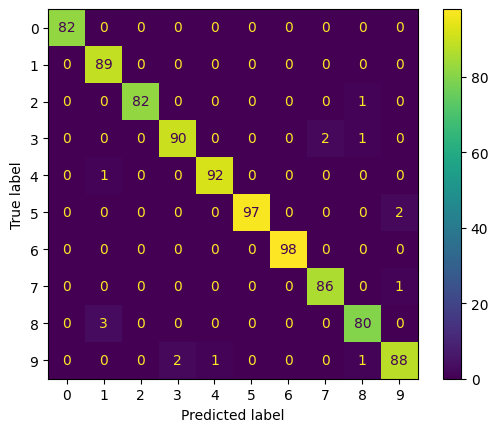

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_knn)
ConfusionMatrixDisplay(cm).plot()
# Inte procent utan heltal

[Text(0.5, 1.0, 'Elbow'), Text(0.5, 0, 'k'), Text(0, 0.5, 'Error')]

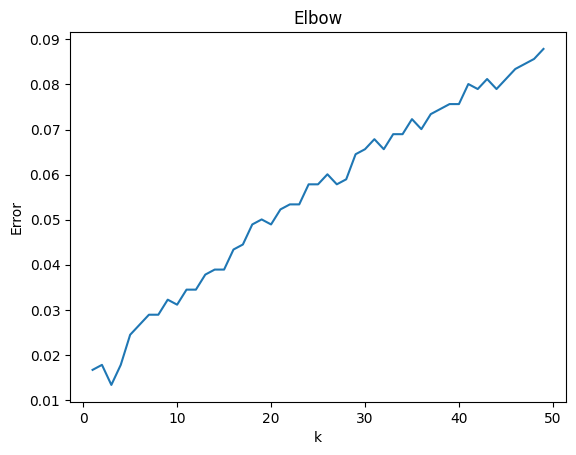

In [12]:
# Förbättring : Hyperoptemering
from sklearn.metrics import accuracy_score

error = 1 - accuracy_score(y_test, y_knn)
error_list = list()

for k in range(1, 50):
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(X_train, y_train)
    y_hat = model_KNN.predict(X_test)
    error_list += [1-accuracy_score(y_test, y_hat)]

fig, ax = plt.figure, plt.axes()

ax.plot(range(1, len(error_list)+1), error_list, '-')
ax.set(title="Elbow", xlabel='k', ylabel='Error')
# Vi ser att 3 knn är det bästa så vi kan gå tillbaka och 
# ändra 3 för att optimera 

# Nu kan vi göra uppgift 00, 01, 02, och  04 i Exercise E05 